<span style="color:blue; font-size:30px; font-family:Arial;">Predicting Hazardous NEOs (Nearest Earth Objects)
</span>



## Done By: Dana Hmeed

#### 1. Data Importing and Cleaning:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [2]:
# dataset exploring
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [5]:
# Show dataset info to ensure no missing values and check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
# Showing Missing Values
data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [9]:
# Filling the missing values with the median for each column
import warnings
warnings.filterwarnings('ignore')
data['absolute_magnitude'].fillna(data['absolute_magnitude'].median(), inplace=True)
data['estimated_diameter_min'].fillna(data['estimated_diameter_min'].median(), inplace=True)
data['estimated_diameter_max'].fillna(data['estimated_diameter_max'].median(), inplace=True)

In [11]:
# Checking after filling missing values
print(data.isnull().sum())

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [13]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

#### 2.Exploratory Data Analysis (EDA)

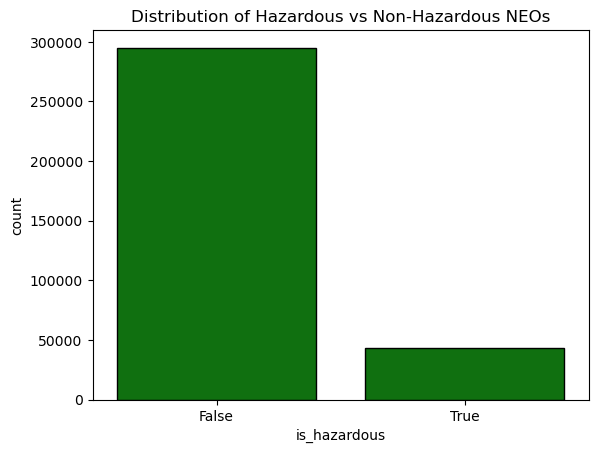

In [15]:
# Visualize the distribution of the target variable 'is_hazardous'
sns.countplot(x='is_hazardous', data=data, color='green', edgecolor='black')
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()



In [17]:
# statistics of numerical columns
print(data.describe())

             neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338199.000000           338199.000000   
mean   1.759939e+07           22.932514                0.157805   
std    2.287225e+07            2.911096                0.313873   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338199.000000      338199.000000   3.381990e+05  
mean                 0.352863       51060.662908   4.153535e+07  
std                  0.701842       26399.238435   2.077399e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30712.031471   2.494540e+07  


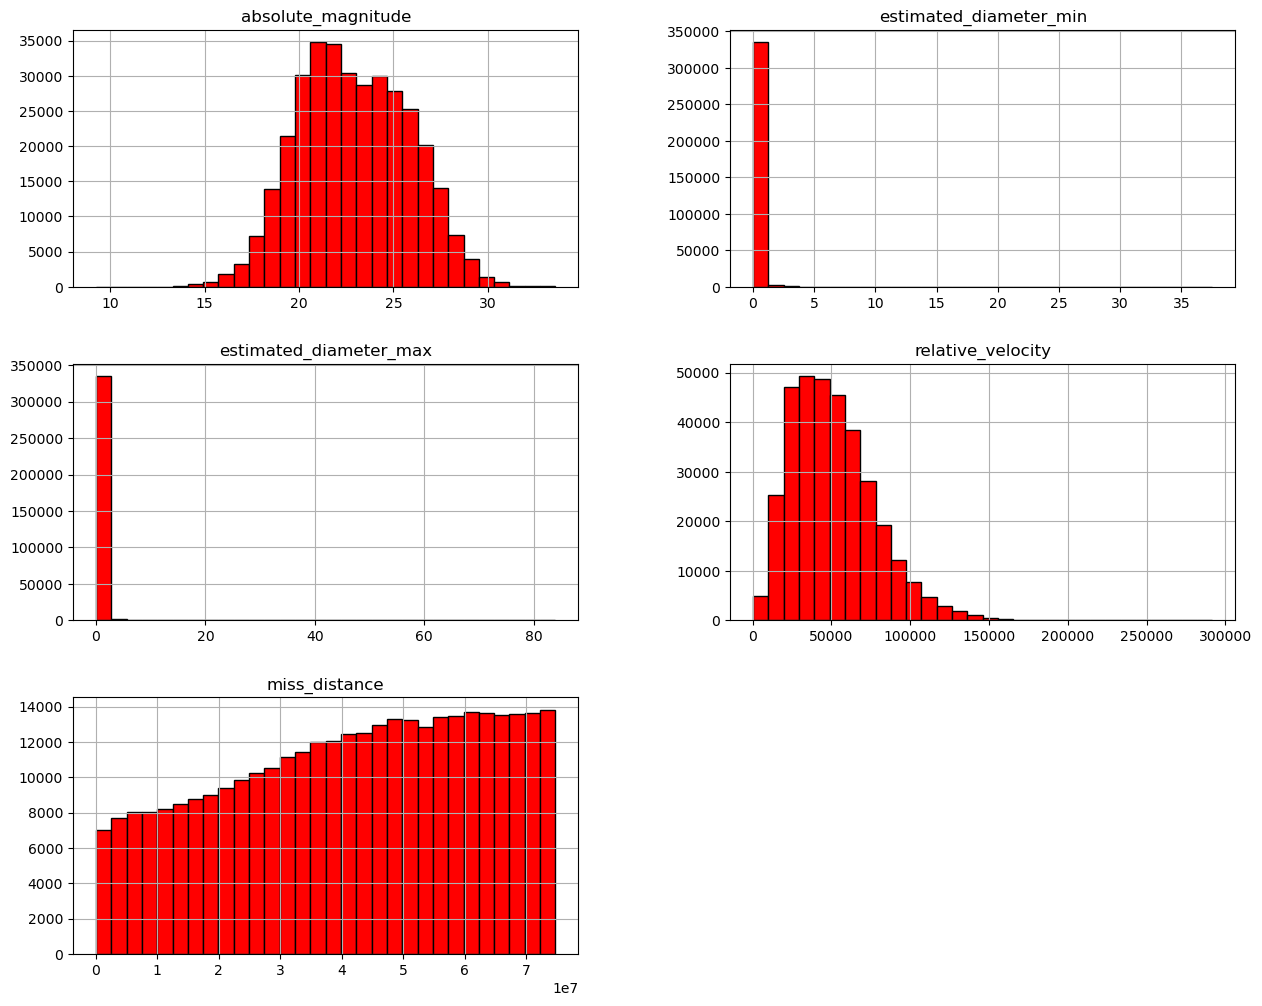

In [19]:
# Visualizing numerical features using histograms
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'neo_id'] 
data[numerical_cols].hist(figsize=(15, 12), bins=30,color='red', edgecolor='black' )
plt.show()

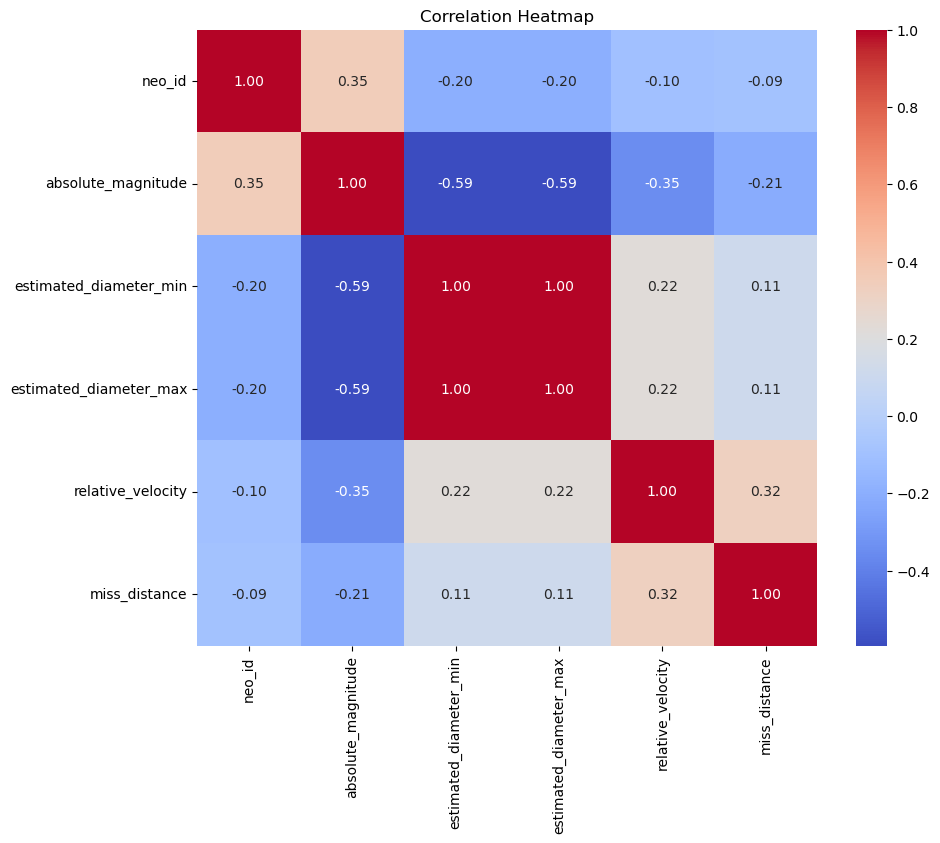

In [21]:
# Select only the numeric columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### 3. Data Preprocessing

In [23]:
# drop columns that won't be useful for prediction (like 'neo_id' and 'name')
data.drop(columns=['neo_id', 'name'], inplace=True)

In [29]:
# Encoding Categorical Variables
# Check if there are any categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)



In [31]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for scaling
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler to scale the numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the changes
data[numerical_cols].head()


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,-1.302781,0.755582,0.755582,0.783537,0.799476
1,-1.522629,1.186901,1.186901,2.230715,0.686711
2,-0.509264,-0.068456,-0.068456,-0.992271,1.235756
3,-0.790945,0.130812,0.130812,1.054176,-0.536196
4,-0.079872,-0.258536,-0.258536,0.188485,1.038958


In [33]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Separate the features (X) and the target variable (y)
X = data.drop('is_hazardous', axis=1)  # Features
y = data['is_hazardous']  # Target variable

imputer = SimpleImputer(strategy='median')  # Using median as a strategy
X_imputed = imputer.fit_transform(X)  # Apply the imputer to the features

# Apply SMOTE to balance the dataset (oversampling the minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Check the new distribution of the classes
print(f"Original class distribution:\n{y.value_counts()}")
print(f"Resampled class distribution:\n{y_resampled.value_counts()}")


Original class distribution:
is_hazardous
False    295037
True      43162
Name: count, dtype: int64
Resampled class distribution:
is_hazardous
False    295037
True     295037
Name: count, dtype: int64


#### 4.Model Training and Evaluation:

Evaluation for Random Forest:
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95     59182
        True       0.94      0.96      0.95     58833

    accuracy                           0.95    118015
   macro avg       0.95      0.95      0.95    118015
weighted avg       0.95      0.95      0.95    118015

AUC-ROC Score: 0.9520


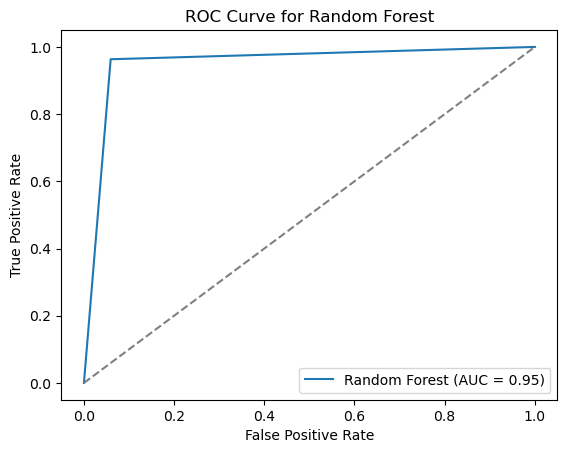

Evaluation for Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.71      0.78     59182
        True       0.75      0.88      0.81     58833

    accuracy                           0.79    118015
   macro avg       0.80      0.79      0.79    118015
weighted avg       0.80      0.79      0.79    118015

AUC-ROC Score: 0.7948


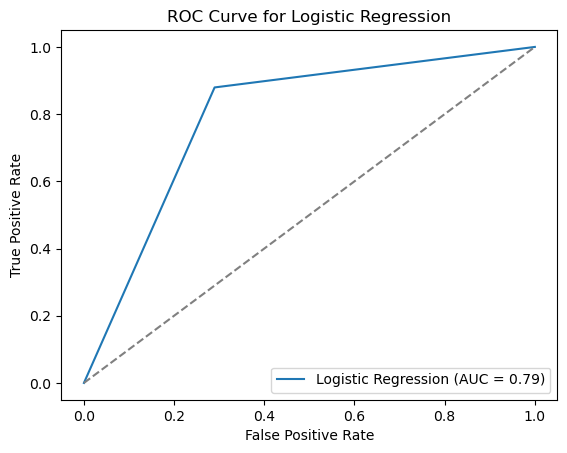

Best model: Random Forest


In [35]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the resampled data into training and test sets
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
rf_model = RandomForestClassifier(random_state=42)
log_reg_model = LogisticRegression(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
log_reg_pred = log_reg_model.predict(X_test)

# Evaluate the models using Precision, Recall, F1-Score, and AUC-ROC
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"AUC-ROC Score: {auc_score:.4f}")
    
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, (y_pred))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score

# Evaluate both models
rf_auc = evaluate_model(y_test, rf_pred, "Random Forest")
log_reg_auc = evaluate_model(y_test, log_reg_pred, "Logistic Regression")

# Select the best model based on AUC-ROC score
best_model = max(rf_auc, log_reg_auc)

# Print the best model
if best_model == rf_auc:
    print("Best model: Random Forest")
else:
    print("Best model: Logistic Regression")
